# VaR Calculation and Analysis project

#### The goal of this project is to implement a Value at Risk (VaR) calculation system using Python. The project will involve collecting historical financial data, implementing various VaR methodologies, and analyzing the results.

In [1]:
#Library import
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

## 1) Data collection

Choose a financial instrument for analysis and collect historical prices for a 1Y period.

In [2]:
# Function to fetch historical stock price data
def get_stock_data(ticker, start_date, end_date):
    """
    Retrieve historical stock data for a given symbol and date range.

    Parameters:
    - symbol (str): Ticker symbol of the stock (e.g., 'AAPL' for Apple).
    - start_date (str): Start date in the format 'YYYY-MM-DD'.
    - end_date (str): End date in the format 'YYYY-MM-DD'.

    Returns:
    - DataFrame: Historical stock data with Date as the index.
    """
        
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Set the stock symbol and date range
stock_symbol = 'AAPL'  # Change this to the desired stock symbol
start_date = '2022-01-01'
end_date = '2023-01-01'

# Fetch historical stock price data
stock_prices = get_stock_data(stock_symbol, start_date, end_date)
stock_prices

[*********************100%%**********************]  1 of 1 completed


Date
2022-01-03    179.953888
2022-01-04    177.669968
2022-01-05    172.943985
2022-01-06    170.056976
2022-01-07    170.225052
                 ...    
2022-12-23    131.127075
2022-12-27    129.307236
2022-12-28    125.339409
2022-12-29    128.889572
2022-12-30    129.207779
Name: Adj Close, Length: 251, dtype: float64

## 2) VaR Methodologies:

Implement at least two VaR methodologies between: Historical, Parametric VaR (Normal Distribution) and Monte Carlo Simulation

In [3]:
def calculate_historical_var(stock_returns, confidence_level=0.95):
    """
    Calculate Historical Value at Risk (VaR) for a single stock.

    Parameters:
    - stock_returns (Series): Series containing the historical returns for a single stock.
    - confidence_level (float): Desired confidence level for VaR calculation (default is 0.95).

    Returns:
    - float: Historical VaR for the stock.
    """

    # Calculate VaR at the desired confidence level
    historical_var = np.percentile(stock_returns, 100 * (1 - confidence_level))

    return historical_var

def calculate_parametric_var(stock_returns, confidence_level=0.95):
    """
    Calculate Parametric Value at Risk (VaR) for a single stock.

    Parameters:
    - stock_returns (Series): Series containing the historical returns for a single stock.
    - confidence_level (float): Desired confidence level for VaR calculation (default is 0.95).

    Returns:
    - float: Parametric VaR for the stock.
    """

    # Calculate mean return and standard deviation
    mean_return = stock_returns.mean()
    std_dev = stock_returns.std()

    # Calculate the z-score corresponding to the confidence level
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate Parametric VaR for the stock
    parametric_var = -(mean_return + z_score * std_dev)

    return parametric_var

def calculate_monte_carlo_var(stock_returns, confidence_level=0.95, num_simulations=10000):
    """
    Calculate Monte Carlo Value at Risk (VaR) for a single stock.

    Parameters:
    - stock_returns (Series): Series containing the historical returns for a single stock.
    - confidence_level (float): Desired confidence level for VaR calculation (default is 0.95).
    - num_simulations (int): Number of Monte Carlo simulations to perform (default is 10,000).

    Returns:
    - float: Monte Carlo VaR for the stock.
    """

    # Generate Monte Carlo simulations of stock returns
    monte_carlo_returns = np.random.normal(stock_returns.mean(), stock_returns.std(), num_simulations)

    # Calculate the VaR at the desired confidence level
    monte_carlo_var = np.percentile(monte_carlo_returns, 100 * (1 - confidence_level))

    return monte_carlo_var

# Set the confidence level for VaR
confidence_level = 0.95

# Load historical stock returns (use the stock_prices from the previous step)
stock_returns = stock_prices.pct_change().dropna()

# Calculate VaR using Historical Simulation
historical_var = calculate_historical_var(stock_returns, confidence_level)
print(f'Historical VaR at {confidence_level * 100}% confidence level: {historical_var:.4f}')

# Calculate VaR using Parametric (Normal Distribution)
parametric_var = calculate_parametric_var(stock_returns, confidence_level)
print(f'Parametric VaR at {confidence_level * 100}% confidence level: {parametric_var:.4f}')

# Calculate VaR using Monte Carlo Simulation
monte_carlo_var = calculate_monte_carlo_var(stock_returns, confidence_level)
print(f'Monte Carlo VaR at {confidence_level * 100}% confidence level: {monte_carlo_var:.4f}')

Historical VaR at 95.0% confidence level: -0.0373
Parametric VaR at 95.0% confidence level: -0.0430
Monte Carlo VaR at 95.0% confidence level: -0.0374


Plot on the same graph, the distribution of the return and the different VaR

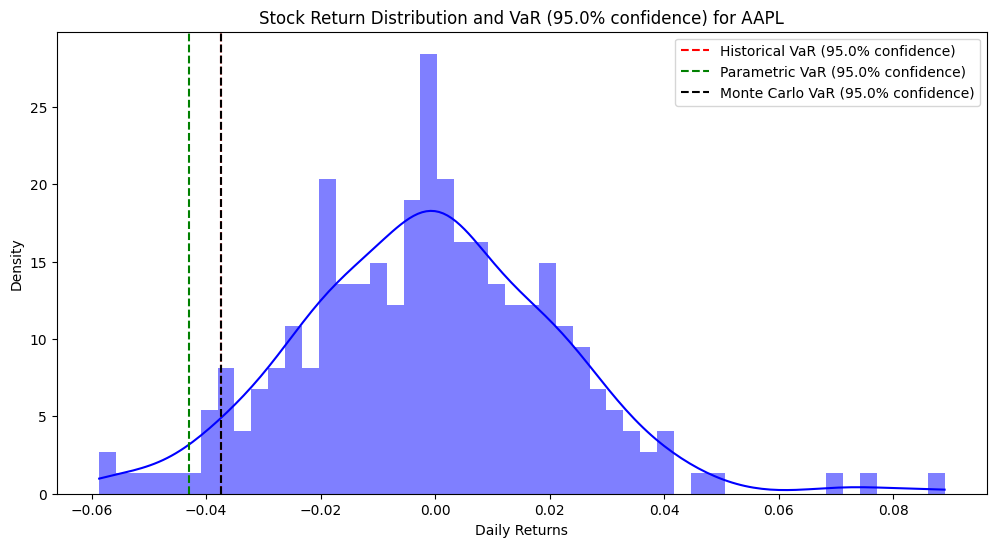

In [4]:
# Plot the distribution of returns with VaR overlay
plt.figure(figsize=(12, 6))
sns.histplot(stock_returns, bins=50, kde=True, color='blue', stat='density', linewidth=0)
plt.axvline(x=historical_var, color='red', linestyle='--', label=f'Historical VaR ({confidence_level * 100}% confidence)')
plt.axvline(x=parametric_var, color='green', linestyle='--', label=f'Parametric VaR ({confidence_level * 100}% confidence)')
plt.axvline(x=monte_carlo_var, color='black', linestyle='--', label=f'Monte Carlo VaR ({confidence_level * 100}% confidence)')
plt.title(f'Stock Return Distribution and VaR ({confidence_level * 100}% confidence) for {stock_symbol}')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

Why parametric VaR is "very" different from the two other measures ? You can use a plot to answer the question

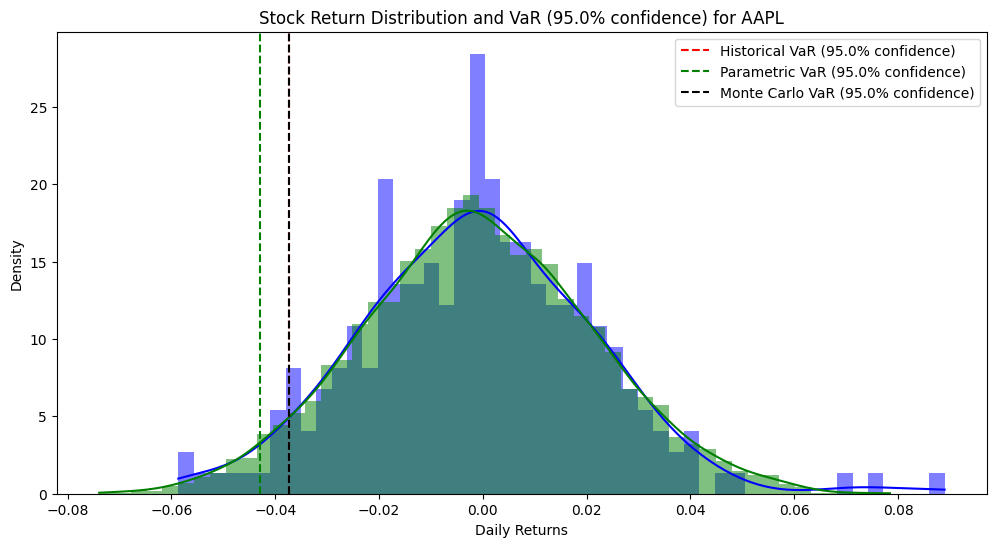

In [5]:
# Plot the distribution of returns with VaR overlay
plt.figure(figsize=(12, 6))
sns.histplot(stock_returns, bins=50, kde=True, color='blue', stat='density', linewidth=0)
sns.histplot(np.random.normal(stock_returns.mean(), stock_returns.std(), 5000), bins=50, kde=True, color='green', stat='density', linewidth=0)
plt.axvline(x=historical_var, color='red', linestyle='--', label=f'Historical VaR ({confidence_level * 100}% confidence)')
plt.axvline(x=parametric_var, color='green', linestyle='--', label=f'Parametric VaR ({confidence_level * 100}% confidence)')
plt.axvline(x=monte_carlo_var, color='black', linestyle='--', label=f'Monte Carlo VaR ({confidence_level * 100}% confidence)')
plt.title(f'Stock Return Distribution and VaR ({confidence_level * 100}% confidence) for {stock_symbol}')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

## 3) Backtesting:

Implement a backtesting framework to assess the accuracy of the VaR estimates.
Evaluate the performance of each VaR methodology using historical data.

In [6]:
def perform_backtesting(actual_returns, var_estimate, confidence_level=0.95):
    """
    Basic backtest for VaR using historical returns.

    Parameters:
    - actual_returns (Series or DataFrame): Actual historical returns.
    - var_forecast (float or Series): Forecasted VaR values corresponding to actual returns.
    - confidence_level (float): Desired confidence level for VaR calculation (default is 0.95).

    Returns:
    - DataFrame: Backtest results including exceedances.
    """

    # Calculate exceedances (instances where actual returns are below the VaR forecast)
    exceedances = actual_returns < -var_estimate

    return exceedances.sum() / len(actual_returns)

# Perform backtesting
exceedance_ratio_historical_var = perform_backtesting(stock_returns, historical_var)
print(f'Exceedance Ratio Historical VaR: {exceedance_ratio_historical_var}')

exceedance_ratio_parametric_var = perform_backtesting(stock_returns, parametric_var)
print(f'Exceedance Ratio Parametric VaR: {exceedance_ratio_parametric_var:.4f}')

exceedance_ratio_monte_carlo_var = perform_backtesting(stock_returns, monte_carlo_var)
print(f'Exceedance Ratio Monte Carlo VaR: {exceedance_ratio_monte_carlo_var:.4f}')

Exceedance Ratio Historical VaR: 0.96
Exceedance Ratio Parametric VaR: 0.9800
Exceedance Ratio Monte Carlo VaR: 0.9600


## 4) Risk Metrics:

Include additional risk metrics such as Expected Shortfall (ES) to provide a comprehensive risk analysis. Like the VaR, you can implement a historical, parametric or Monte Carlo ES.

In [7]:
# Function to calculate Expected Shortfall (ES)
def calculate_historical_es(returns, confidence_level=0.95):
    """
    Calculate Historical Expected Shortfall (ES).

    Parameters:
    - returns (array or Series): Historical returns.
    - confidence_level (float): Desired confidence level (default is 0.95).

    Returns:
    - float: Historical Expected Shortfall.
    """

    # Calculate Historical VaR at the given confidence level
    var_threshold = np.percentile(returns, 100 * (1 - confidence_level))

    # Identify returns below the VaR threshold
    exceedances = returns < var_threshold

    # Calculate Historical Expected Shortfall
    historical_es = np.mean(returns[exceedances])

    return historical_es


# Function to calculate Parametric Expected Shortfall (ES)
def calculate_parametric_es(returns, confidence_level=0.95):
    """
    Calculate Parametric Expected Shortfall (ES).

    Parameters:
    - returns (array or Series): Historical returns.
    - confidence_level (float): Desired confidence level (default is 0.95).

    Returns:
    - float: Parametric Expected Shortfall.
    """
        
    mean_return = np.mean(returns)
    std_dev = np.std(returns)
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    var_threshold = -(mean_return + z_score * std_dev)

    es_returns = returns[returns < var_threshold]
    return np.mean(es_returns)


# Function to calculate Monte Carlo Expected Shortfall (ES)
def calculate_monte_carlo_es(returns, confidence_level=0.95, num_simulations=10000):
    """
    Calculate Monte Carlo Expected Shortfall (ES).

    Parameters:
    - returns (array or Series): Historical returns.
    - confidence_level (float): Desired confidence level (default is 0.95).

    Returns:
    - float: Monte Carlo Expected Shortfall.
    """
    simulations = np.random.normal(np.mean(returns), np.std(returns), num_simulations)
    var_threshold = np.percentile(returns, 100 * (1 - confidence_level))

    es_returns = returns[returns < var_threshold]
    return np.mean(es_returns)

# Calculate ES using different methodologies
historical_es = calculate_historical_es(stock_returns, confidence_level)
print(f'Historical ES at {confidence_level * 100}% confidence level: {historical_es:.4f}')

parametric_es = calculate_parametric_es(stock_returns, confidence_level)
print(f'Parametric ES at {confidence_level * 100}% confidence level: {parametric_es:.4f}')

monte_carlo_es = calculate_monte_carlo_es(stock_returns, confidence_level)
print(f'Monte Carlo ES at {confidence_level * 100}% confidence level: {monte_carlo_es:.4f}')

Historical ES at 95.0% confidence level: -0.0455
Parametric ES at 95.0% confidence level: -0.0531
Monte Carlo ES at 95.0% confidence level: -0.0455


Plot the same graph as before but adding the Expected Shortfall measure

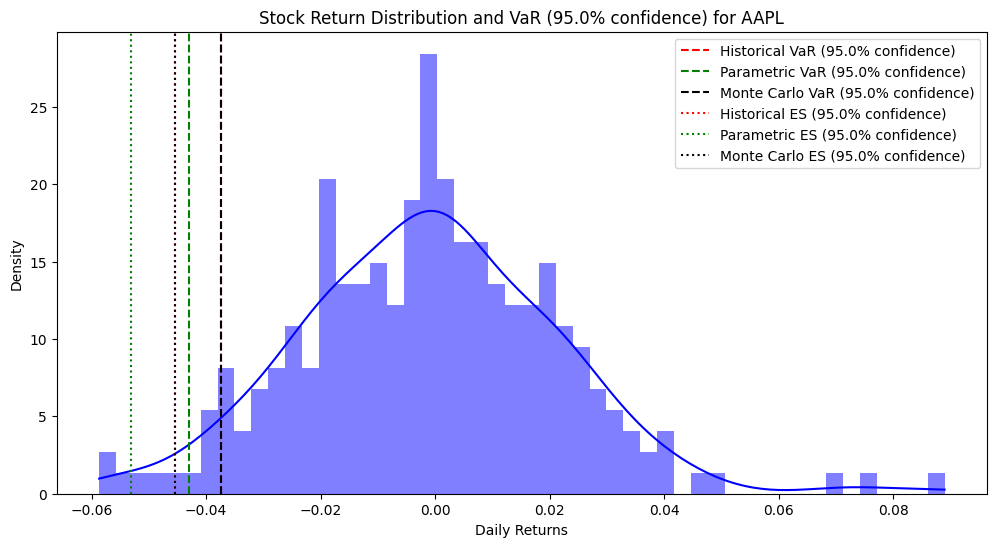

In [8]:
# Plot the distribution of returns with VaR and ES overlay
plt.figure(figsize=(12, 6))
sns.histplot(stock_returns, bins=50, kde=True, color='blue', stat='density', linewidth=0)
plt.axvline(x=historical_var, color='red', linestyle='--', label=f'Historical VaR ({confidence_level * 100}% confidence)')
plt.axvline(x=parametric_var, color='green', linestyle='--', label=f'Parametric VaR ({confidence_level * 100}% confidence)')
plt.axvline(x=monte_carlo_var, color='black', linestyle='--', label=f'Monte Carlo VaR ({confidence_level * 100}% confidence)')
plt.axvline(x=historical_es, color='red', linestyle=':', label=f'Historical ES ({confidence_level * 100}% confidence)')
plt.axvline(x=parametric_es, color='green', linestyle=':', label=f'Parametric ES ({confidence_level * 100}% confidence)')
plt.axvline(x=monte_carlo_es, color='black', linestyle=':', label=f'Monte Carlo ES ({confidence_level * 100}% confidence)')
plt.title(f'Stock Return Distribution and VaR ({confidence_level * 100}% confidence) for {stock_symbol}')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

## 6) VaR sensitivity

Change the confidence level or the data horizon to see impacts on previous metrics

In [9]:
results = []

for confidence_level in [0.95, 0.99, 0.999]:
    historical_var = calculate_historical_var(stock_returns, confidence_level)
    parametric_var = calculate_parametric_var(stock_returns, confidence_level)
    monte_carlo_var = calculate_monte_carlo_var(stock_returns, confidence_level)

    historical_es = calculate_historical_es(stock_returns, confidence_level)
    parametric_es = calculate_parametric_es(stock_returns, confidence_level)
    monte_carlo_es = calculate_monte_carlo_es(stock_returns, confidence_level)
    
    results.append([historical_var, parametric_var, monte_carlo_var, historical_es, parametric_es, monte_carlo_es])
    
pd.DataFrame(np.array(results).T, ["Historical VaR", "Parametric VaR", "Parametric VaR", "Historical ES", "Parametric ES", "Parametric ES"], columns=["95%", "99%", "99,9%"])

,95%,99%,"99,9%"
Historical VaR,-0.037318,-0.053817,-0.058117
Parametric VaR,-0.042969,-0.056809,-0.072869
Parametric VaR,-0.037577,-0.052759,-0.071154
Historical ES,-0.045476,-0.056938,-0.058679
Parametric ES,-0.053105,-0.058679,NaN
Parametric ES,-0.045476,-0.056938,-0.058679


Comments:

## 5.1) Additional Challenges (Optional)

Implement a stress testing scenarios framework and see impacts on previous metrics

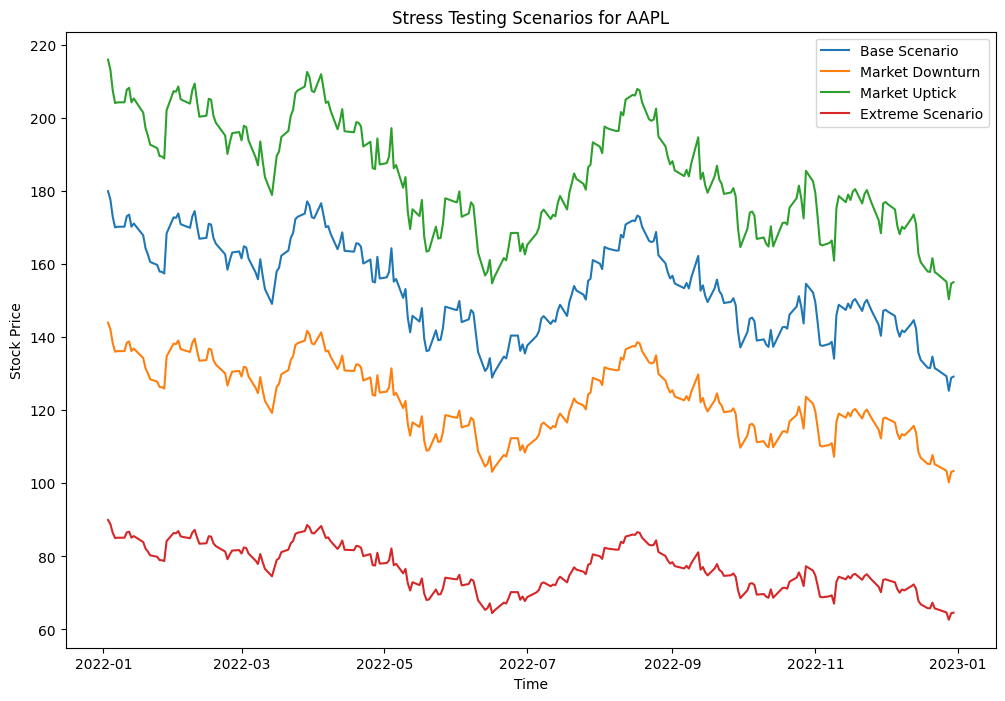

Confidence level            95%                                              \
VaR types        Historical VaR Parametric VaR Parametric VaR Historical ES   
Base Scenario         -0.037318      -0.042969      -0.038410     -0.045476   
Market Downturn       -0.037318      -0.042969      -0.038383     -0.045476   
Market Uptick         -0.037318      -0.042969      -0.038412     -0.045476   
Extreme Scenario      -0.037318      -0.042969      -0.038682     -0.045476   

Confidence level                                        99%                 \
VaR types        Parametric ES Parametric ES Historical VaR Parametric VaR   
Base Scenario        -0.053105     -0.045476      -0.053817      -0.056809   
Market Downturn      -0.053105     -0.045476      -0.053817      -0.056809   
Market Uptick        -0.053105     -0.045476      -0.053817      -0.056809   
Extreme Scenario     -0.053105     -0.045476      -0.053817      -0.056809   

Confidence level                                                           \
VaR types        Parametric VaR Historical ES Parametric ES Parametric ES   
Base Scenario         -0.053365     -0.056938     -0.058679     -0.056938   
Market Downturn       -0.053001     -0.056938     -0.058679     -0.056938   
Market Uptick         -0.053360     -0.056938     -0.058679     -0.056938   
Extreme Scenario      -0.055318     -0.056938     -0.058679     -0.056938   

Confidence level          99,9%                                              \
VaR types        Historical VaR Parametric VaR Parametric VaR Historical ES   
Base Scenario         -0.058117      -0.072869      -0.073335     -0.058679   
Market Downturn       -0.058117      -0.072869      -0.068350     -0.058679   
Market Uptick         -0.058117      -0.072869      -0.068850     -0.058679   
Extreme Scenario      -0.058117      -0.072869      -0.071799     -0.058679   

Confidence level                              
VaR types        Parametric ES Parametric ES  
Base Scenario              NaN     -0.058679  
Market Downturn            NaN     -0.058679  
Market Uptick              NaN     -0.058679  
Extreme Scenario           NaN     -0.058679

In [10]:
# Function to perform stress testing scenarios
def stress_test_scenarios(stock_prices, scenarios):
    results = pd.DataFrame(index=stock_prices.index)

    for scenario_name, stress_factor in scenarios.items():
        stressed_prices = stock_prices * stress_factor
        results[scenario_name] = stressed_prices

    return results

# Define stress test scenarios (hypothetical stress factors)
scenarios = {
    'Base Scenario': 1.0,
    'Market Downturn': 0.8,
    'Market Uptick': 1.2,
    'Extreme Scenario': 0.5
}

# Perform stress testing
stress_test_results = stress_test_scenarios(stock_prices, scenarios)

# Plot stress test scenarios
plt.figure(figsize=(12, 8))
for scenario_name in stress_test_results.columns:
    plt.plot(stress_test_results.index, stress_test_results[scenario_name], label=scenario_name)

plt.title(f'Stress Testing Scenarios for {stock_symbol}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

results=[]
for scenario_name in stress_test_results.columns:
    results_temp = []
    for confidence_level in [0.95, 0.99, 0.999]:
        stock_returns =  stress_test_results[scenario_name].pct_change().dropna()
        historical_var = calculate_historical_var(stock_returns, confidence_level)
        parametric_var = calculate_parametric_var(stock_returns, confidence_level)
        monte_carlo_var = calculate_monte_carlo_var(stock_returns, confidence_level)

        historical_es = calculate_historical_es(stock_returns, confidence_level)
        parametric_es = calculate_parametric_es(stock_returns, confidence_level)
        monte_carlo_es = calculate_monte_carlo_es(stock_returns, confidence_level)
    
        results_temp.extend([historical_var, parametric_var, monte_carlo_var, historical_es, parametric_es, monte_carlo_es])
    results.append(results_temp)

header = pd.MultiIndex.from_product([["95%", "99%", "99,9%"], ["Historical VaR", "Parametric VaR", "Parametric VaR", "Historical ES", "Parametric ES", "Parametric ES"]], names=['Confidence level','VaR types'])

pd.DataFrame(np.array(results), index=stress_test_results.columns, columns=header)

## 5.2) Additional Challenges (Optional)

Implement a function to compute VaR on a portfolio

In [13]:
# Function to calculate portfolio returns
def calculate_portfolio_returns(weights, returns):
    portfolio_return = np.dot(returns.mean(), weights)
    return portfolio_return

# Function to calculate portfolio VaR using Historical Simulation
def calculate_historical_portfolio_var(weights, returns, confidence_level=0.95):
    portfolio_returns = np.dot(returns, weights)
    sorted_returns = np.sort(portfolio_returns)
    var_index = int((1 - confidence_level) * len(sorted_returns))
    return -sorted_returns[var_index]

def calculate_parametric_portfolio_var(weights, returns, confidence_level=0.95):
    # Calculate the mean return and covariance matrix of returns
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    # Calculate portfolio mean return and standard deviation
    portfolio_mean_return = np.dot(mean_returns, weights)
    portfolio_std_dev = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))

    # Calculate the z-score corresponding to the confidence level
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate parametric VaR for the portfolio
    parametric_var = -(portfolio_mean_return + z_score * portfolio_std_dev)

    return parametric_var

def calculate_monte_carlo_portfolio_var(weights, returns, confidence_level=0.95, num_simulations=10000):
    # Calculate the mean return and covariance matrix of returns
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    # Generate Monte Carlo simulations of portfolio returns
    portfolio_returns = np.dot(np.random.multivariate_normal(mean_returns, cov_matrix, num_simulations), weights)

    # Calculate the VaR at the desired confidence level
    var_index = int((1 - confidence_level) * num_simulations)
    monte_carlo_var = -np.sort(portfolio_returns)[var_index]

    return monte_carlo_var

# Set portfolio symbols and date range
portfolio_symbols = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2022-01-01'
end_date = '2023-01-01'

# Get historical stock prices for the portfolio
portfolio_data = get_stock_data(portfolio_symbols, start_date, end_date)

# Calculate daily returns for each stock
returns = portfolio_data.pct_change().dropna()

# Define initial weights for the portfolio
initial_weights = [0.4, 0.4, 0.2]

# Calculate portfolio returns and VaR
portfolio_return = calculate_portfolio_returns(initial_weights, returns)
confidence_level = 0.95
historical_portfolio_var = calculate_historical_portfolio_var(initial_weights, returns, confidence_level)
parametric_portfolio_var = calculate_parametric_portfolio_var(initial_weights, returns, confidence_level)
monte_carlo_portfolio_var = calculate_monte_carlo_portfolio_var(initial_weights, returns, confidence_level)

# Print the results
print(f'Portfolio Return: {portfolio_return:.4f}')
print(f'Portfolio Historical VaR at {confidence_level * 100}% confidence level: {historical_portfolio_var:.4f}')
print(f'Portfolio Parametric VaR at {confidence_level * 100}% confidence level: {parametric_portfolio_var:.4f}')
print(f'Portfolio Monte Carlo VaR at {confidence_level * 100}% confidence level: {monte_carlo_portfolio_var:.4f}')

[*********************100%%**********************]  3 of 3 completed
Portfolio Return: -0.0013
Portfolio Historical VaR at 95.0% confidence level: 0.0367
Portfolio Parametric VaR at 95.0% confidence level: -0.0414
Portfolio Monte Carlo VaR at 95.0% confidence level: 0.0368


Plot graph to illustrate the results

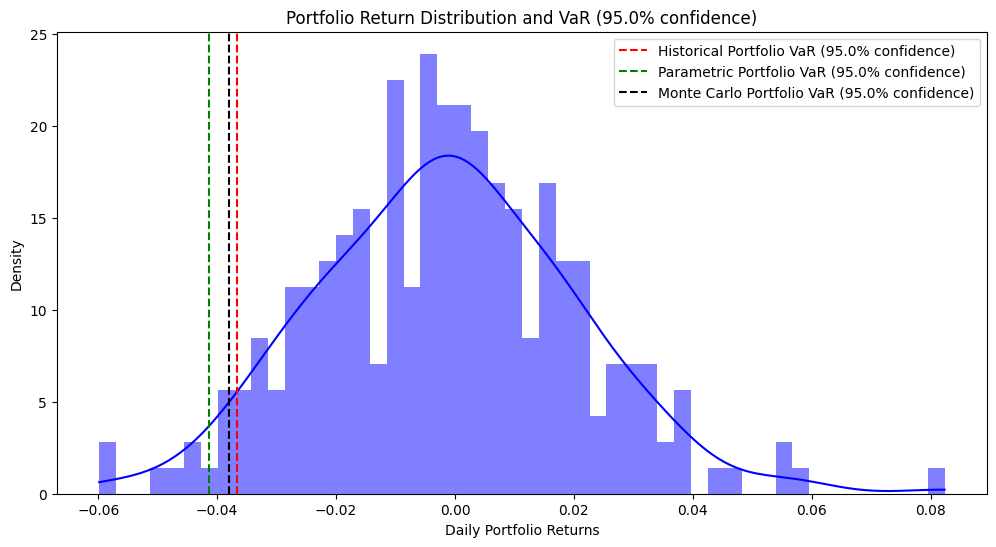

In [12]:
# Plot the distribution of portfolio returns
portfolio_returns = np.dot(returns, initial_weights)
plt.figure(figsize=(12, 6))
sns.histplot(portfolio_returns, bins=50, kde=True, color='blue', stat='density', linewidth=0)
plt.axvline(x=-historical_portfolio_var, color='red', linestyle='--', label=f'Historical Portfolio VaR ({confidence_level * 100}% confidence)')
plt.axvline(x=parametric_portfolio_var, color='green', linestyle='--', label=f'Parametric Portfolio VaR ({confidence_level * 100}% confidence)')
plt.axvline(x=-monte_carlo_portfolio_var, color='black', linestyle='--', label=f'Monte Carlo Portfolio VaR ({confidence_level * 100}% confidence)')
plt.title(f'Portfolio Return Distribution and VaR ({confidence_level * 100}% confidence)')
plt.xlabel('Daily Portfolio Returns')
plt.ylabel('Density')
plt.legend()
plt.show()